In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as py
import seaborn as sns 
from sklearn import svm, preprocessing
from matplotlib import style

In [2]:
df = pd.read_csv('Hotel Reservations.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<h>Data Dictionary</h>

<li>Booking_ID: unique identifier of each booking</li>
<li>no_of_adults: Number of adults</li>
<li>no_of_children: Number of Children</li>
<li>no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel</li>
<li>no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel</li>
<li>type_of_meal_plan: Type of meal plan booked by the customer:</li>
<li>required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)</li>
<li>room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.</li>
<li>lead_time: Number of days between the date of booking and the arrival date</li>
<li>arrival_year: Year of arrival date</li>
<li>arrival_month: Month of arrival date</li>
<li>arrival_date: Date of the month</li>
<li>market_segment_type: Market segment designation.</li>
<li>repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)</li>
<li>no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking</li>
<li>no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking</li>
<li>avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)</li>
<li>no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)</li>
<li>booking_status: Flag indicating if the booking was canceled or not.</li>

In [4]:
df.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
no_of_adults,
2,26108
1,7695
3,2317
0,139
4,16


array([<AxesSubplot: ylabel='count'>], dtype=object)

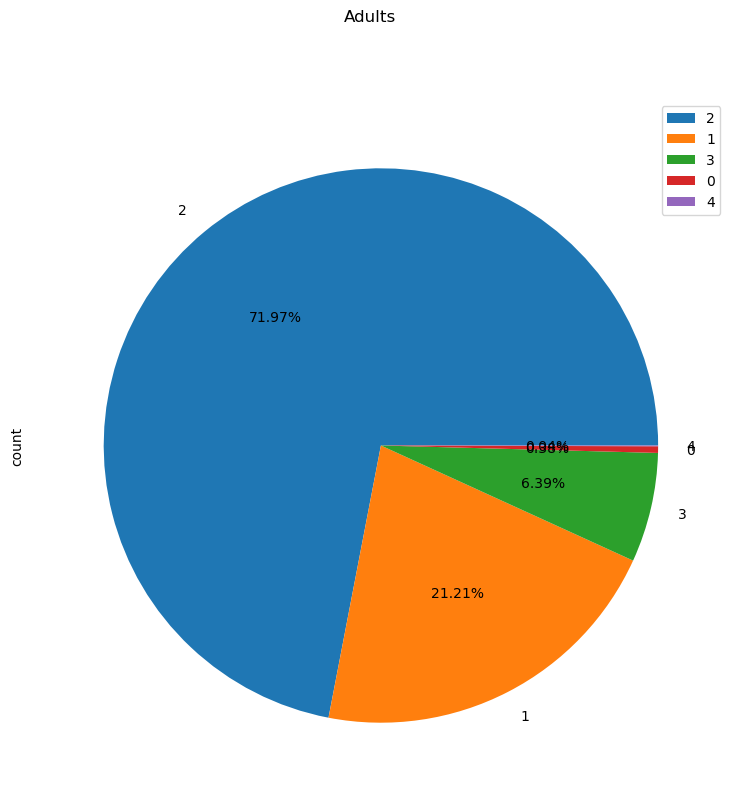

In [5]:
#Number of  adult vistor #
df.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct ='%1.2f%%',subplots=True,title = 'Adults',figsize=(9,9))


In [6]:
df.groupby('no_of_children')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
no_of_children,
0,33577
1,1618
2,1058
3,19
9,2
10,1


array([<AxesSubplot: ylabel='count'>], dtype=object)

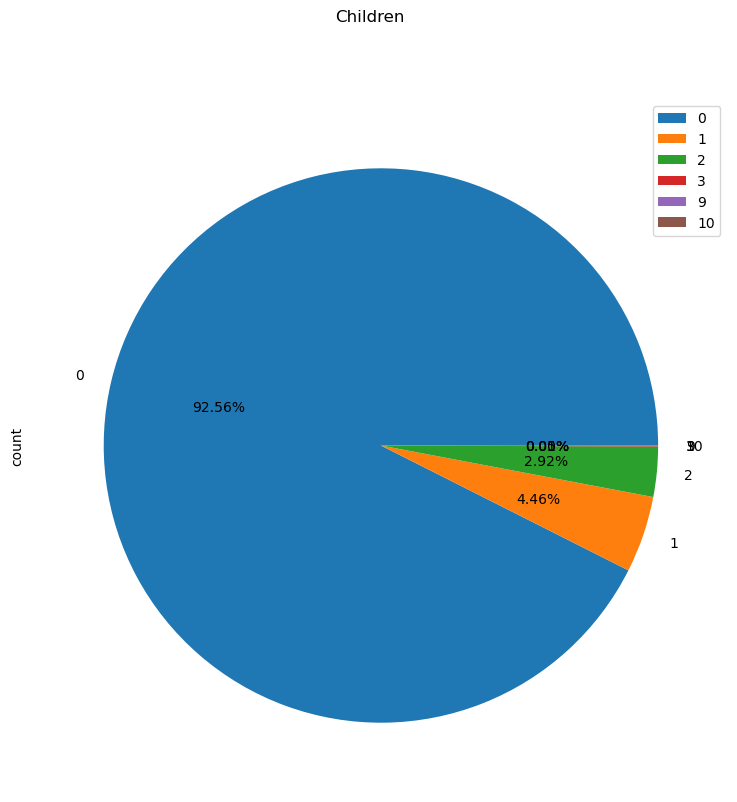

In [7]:
df.groupby('no_of_children')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).sort_values(by='count',ascending=False).plot(kind='pie',autopct ='%1.2f%%',subplots=True,title = 'Children',figsize=(9,9))


In [8]:
df.groupby('no_of_weekend_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
no_of_weekend_nights,
0,16872
1,9995
2,9071
3,153
4,129
5,34
6,20
7,1


<AxesSubplot: title={'center': 'Number of night'}, xlabel='no_of_weekend_nights'>

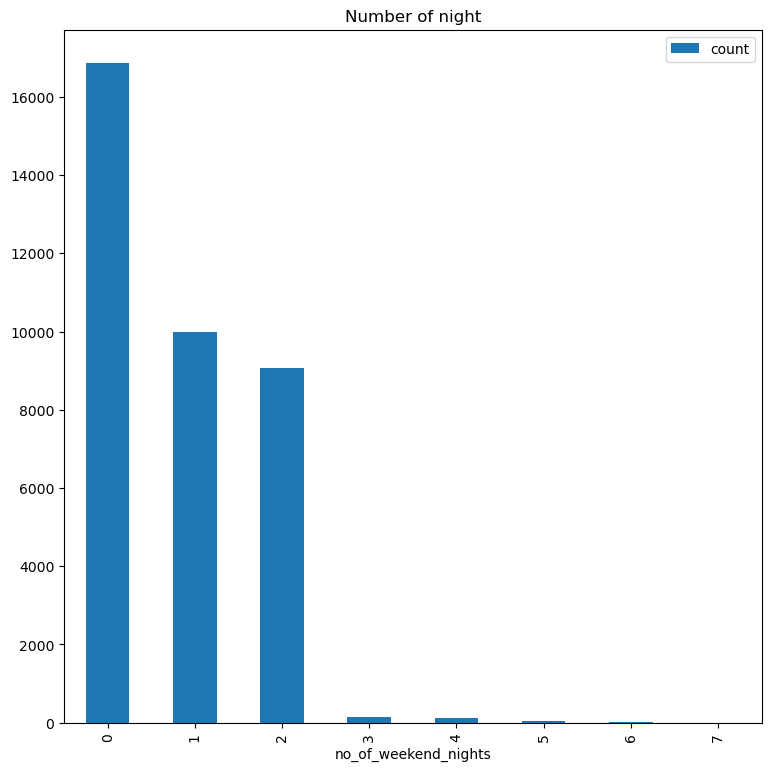

In [9]:
df.groupby('no_of_weekend_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',title='Number of night',figsize=(9,9))

<AxesSubplot: xlabel='no_of_week_nights', ylabel='Count'>

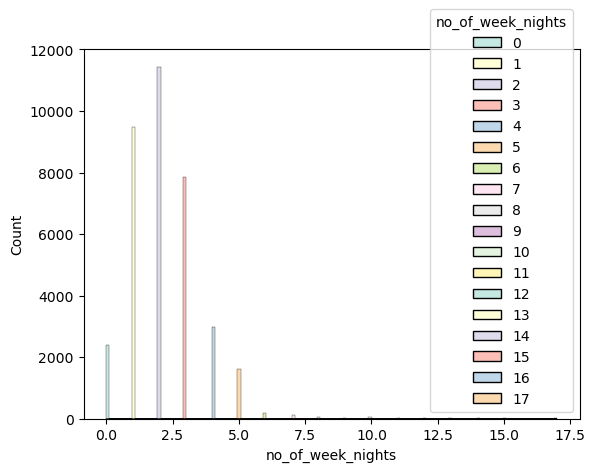

In [10]:
sns.histplot(x='no_of_week_nights',data = df,hue='no_of_week_nights',kde=True,palette='Set3')

type_of_meal_plan

In [11]:
df.groupby('type_of_meal_plan')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305
Meal Plan 3,5


array([<AxesSubplot: ylabel='count'>], dtype=object)

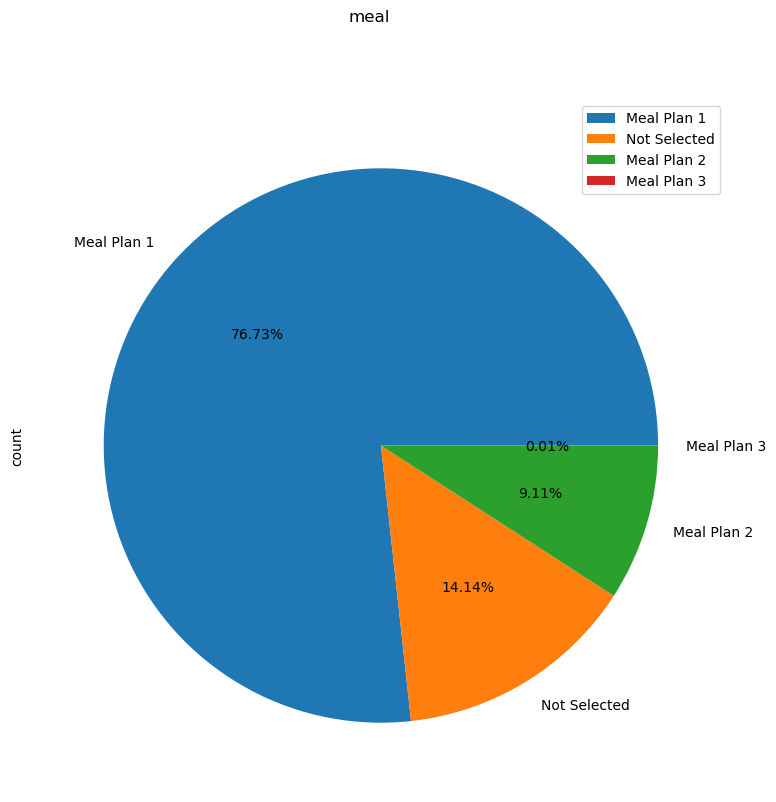

In [12]:
df.groupby('type_of_meal_plan')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct ='%1.2f%%',title='meal',subplots=True,figsize=(9,9))

required_car_parking_space

In [13]:
df.groupby('required_car_parking_space')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
required_car_parking_space,
0,35151
1,1124


array([<AxesSubplot: ylabel='count'>], dtype=object)

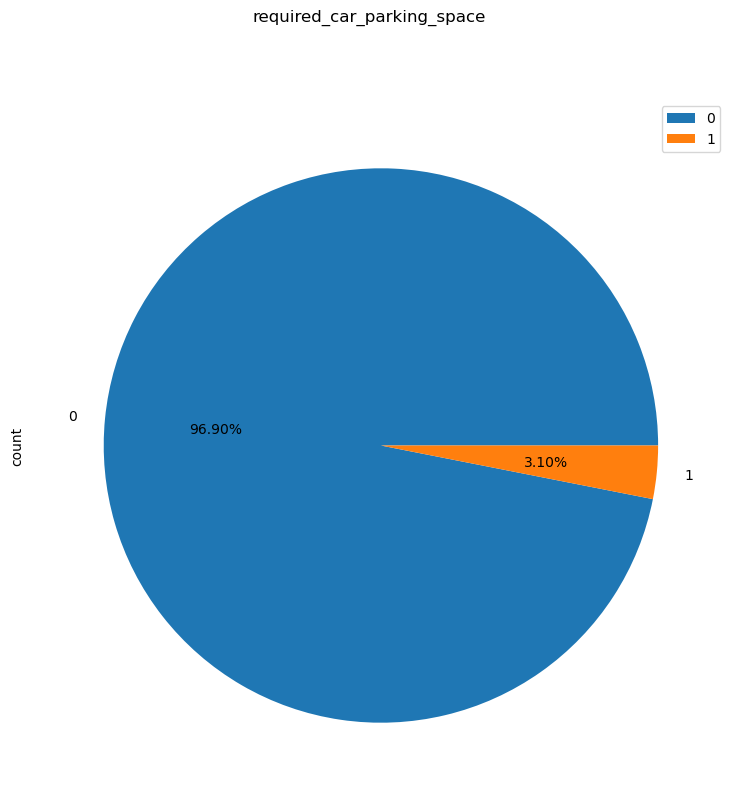

In [14]:
df.groupby('required_car_parking_space')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct ='%1.2f%%',title='required_car_parking_space',subplots=True,figsize=(9,9))

room_type_reserved

In [15]:
df.groupby('room_type_reserved')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
room_type_reserved,
Room_Type 1,28130
Room_Type 4,6057
Room_Type 6,966
Room_Type 2,692
Room_Type 5,265
Room_Type 7,158
Room_Type 3,7


array([<AxesSubplot: ylabel='count'>], dtype=object)

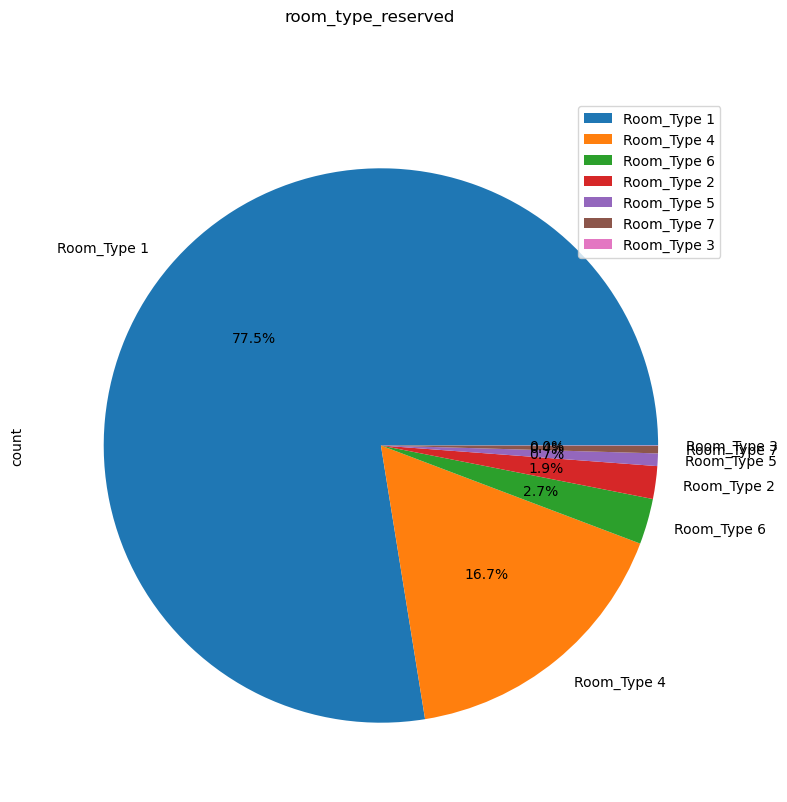

In [16]:
df.groupby('room_type_reserved')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct ='%1.1f%%',title='room_type_reserved',subplots=True,figsize=(9,9))

market_segment_type

In [17]:
df.groupby('market_segment_type')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


array([<AxesSubplot: ylabel='count'>], dtype=object)

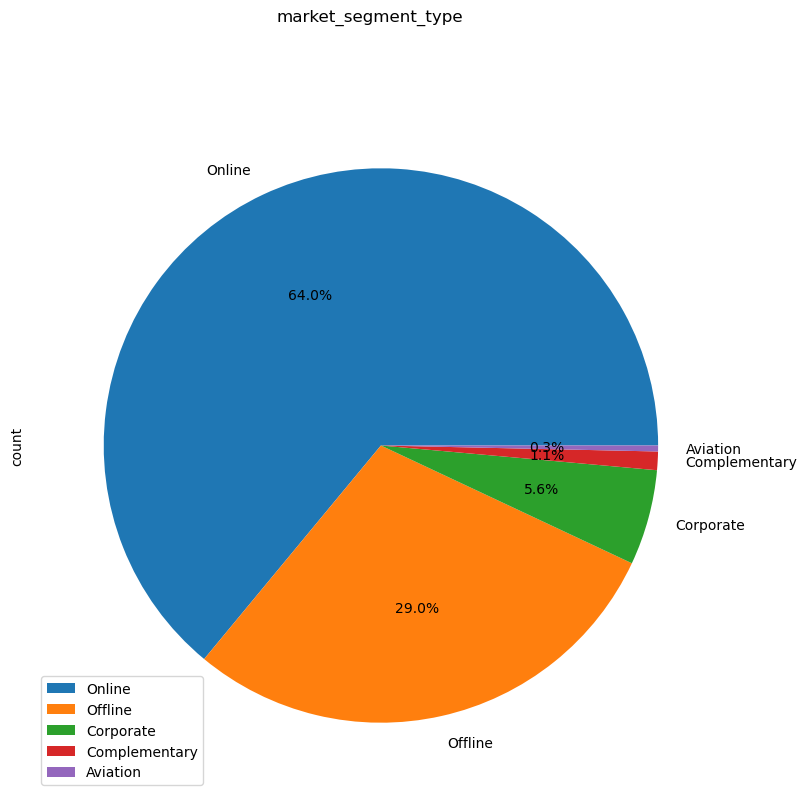

In [18]:
df.groupby('market_segment_type')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct ='%1.1f%%',title='market_segment_type',subplots=True,figsize=(9,9))

no_of_special_requests

In [19]:
df.groupby('no_of_special_requests')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
no_of_special_requests,
0,19777
1,11373
2,4364
3,675
4,78
5,8


booking_status

In [20]:
df.groupby('booking_status')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False)

,count
booking_status,
Not_Canceled,24390
Canceled,11885


array([<AxesSubplot: ylabel='count'>], dtype=object)

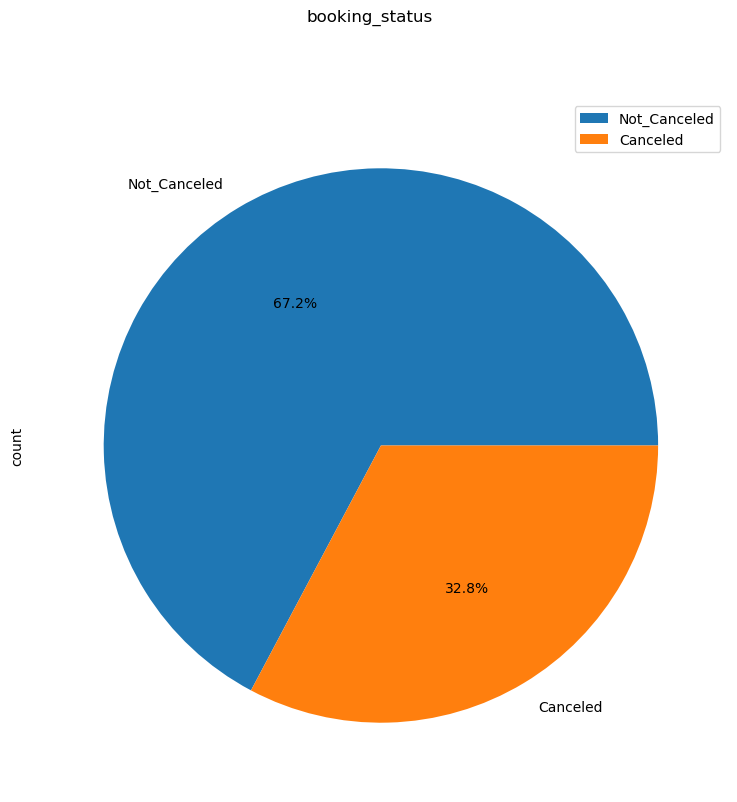

In [21]:
df.groupby('booking_status')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct ='%1.1f%%',title='booking_status',subplots=True,figsize=(9,9))

In [22]:
df.select_dtypes('object').columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [23]:
features = df.drop(columns = ['Booking_ID', 'booking_status'])
target = df['booking_status']
print(target)

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object


In [24]:
features.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0


In [25]:
features.type_of_meal_plan.unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [26]:
features.room_type_reserved.unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [27]:
features.market_segment_type.unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [28]:
target.unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [29]:
Transformed_features = pd.get_dummies(features,columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])
Transformed_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [30]:
Transformed_features

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,1,0,0,0,0,0,0,0,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,0,0,1


In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words. 

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [31]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
target = label_encoder.fit_transform(target)
target= pd.DataFrame(target)
target

,0
0,1
1,1
2,0
3,0
4,0
...,...
36270,1
36271,0
36272,1
36273,0
